In [97]:
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
#path to data
path = 'data/'
start_date = '2014-10-08'
end_date = '2024-08-27'

In [99]:
#portfolio to assess in the portfolio analysis
market = 'NASDAQ_COMP'
portfolio = ['AAOI', 'AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMGN', 'INTC', 'DTI', market]

In [100]:
df = pd.DataFrame(columns=['date'])

for ticker in portfolio:
    data = pd.read_csv(path+ticker+'.csv')
    print(data.shape)
    df = pd.merge(df, data[['date', 'close']], on='date', how='outer', suffixes=(ticker, ticker))

#rename column names with Ticker values
df.columns = ['date'] + [i for i in portfolio]


(2748, 6)
(11019, 6)
(3566, 6)
(5040, 6)
(9692, 6)
(10384, 6)
(13265, 6)
(597, 6)
(2527, 6)


In [101]:
#convert dates to datetime
df['date'] = pd.to_datetime(df['date'])

#sort dates
df = df.sort_values(by='date')

# Reset the index
df.reset_index(drop=True, inplace=True)

#drop any rows with NaNs
#df = df.dropna()

#filter data from start and end dates
df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

In [102]:
df

,date,AAOI,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,DTI,NASDAQ_COMP
10777,2014-10-08,14.70,22.5851,17.2853,29.1870,40.5723,111.848,27.0889,NaN,4468.59
10778,2014-10-09,14.00,22.6330,17.1340,28.5405,39.7691,109.853,26.5752,NaN,4378.34
10779,2014-10-10,13.07,22.5732,15.7940,27.7595,38.1857,109.697,25.2222,NaN,4276.24
10780,2014-10-13,12.13,22.3638,14.9727,27.2375,37.8551,106.628,24.8755,NaN,4213.66
10781,2014-10-14,13.40,22.1265,15.1373,27.4345,37.9286,105.561,25.4069,NaN,4227.17
...,...,...,...,...,...,...,...,...,...,...
13271,2024-08-21,8.92,226.4000,223.2700,165.8500,424.1400,329.150,21.4100,4.02,17918.99
13272,2024-08-22,9.03,224.5300,210.6600,163.8200,415.7800,324.720,20.1200,3.92,17619.35
13273,2024-08-23,9.71,226.8400,220.3200,165.6200,416.7900,328.800,20.5400,4.07,17877.79
13274,2024-08-26,9.62,227.2200,213.2350,166.1600,413.6100,326.900,20.1400,4.29,17725.76


<Axes: >

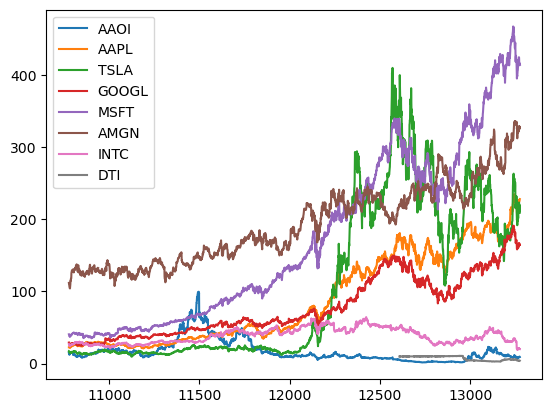

In [103]:
df[portfolio[:-1]].plot()

# Daily Rate of Returns

In [104]:
df_daily_ROR = pd.DataFrame()
df_daily_ROR[portfolio] = (df[portfolio].diff()/df[portfolio].shift(1))*100
df_daily_ROR['date'] = df['date']


<Axes: >

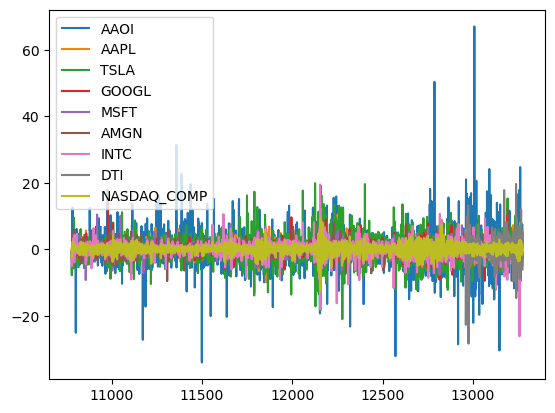

In [105]:
df_daily_ROR[portfolio].plot()

In [106]:
df

,date,AAOI,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,DTI,NASDAQ_COMP
10777,2014-10-08,14.70,22.5851,17.2853,29.1870,40.5723,111.848,27.0889,NaN,4468.59
10778,2014-10-09,14.00,22.6330,17.1340,28.5405,39.7691,109.853,26.5752,NaN,4378.34
10779,2014-10-10,13.07,22.5732,15.7940,27.7595,38.1857,109.697,25.2222,NaN,4276.24
10780,2014-10-13,12.13,22.3638,14.9727,27.2375,37.8551,106.628,24.8755,NaN,4213.66
10781,2014-10-14,13.40,22.1265,15.1373,27.4345,37.9286,105.561,25.4069,NaN,4227.17
...,...,...,...,...,...,...,...,...,...,...
13271,2024-08-21,8.92,226.4000,223.2700,165.8500,424.1400,329.150,21.4100,4.02,17918.99
13272,2024-08-22,9.03,224.5300,210.6600,163.8200,415.7800,324.720,20.1200,3.92,17619.35
13273,2024-08-23,9.71,226.8400,220.3200,165.6200,416.7900,328.800,20.5400,4.07,17877.79
13274,2024-08-26,9.62,227.2200,213.2350,166.1600,413.6100,326.900,20.1400,4.29,17725.76


In [107]:
df_daily_ROR

,AAOI,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,DTI,NASDAQ_COMP,date
10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-08
10778,-4.761905,0.212087,-0.875310,-2.215027,-1.979676,-1.783671,-1.896349,NaN,-2.019653,2014-10-09
10779,-6.642857,-0.264216,-7.820707,-2.736462,-3.981483,-0.142008,-5.091213,NaN,-2.331934,2014-10-10
10780,-7.192043,-0.927649,-5.200076,-1.880437,-0.865769,-2.797706,-1.374583,NaN,-1.463435,2014-10-13
10781,10.469909,-1.061090,1.099334,0.723268,0.194161,-1.000675,2.136238,NaN,0.320624,2014-10-14
...,...,...,...,...,...,...,...,...,...,...
13271,1.594533,-0.048563,0.984654,-0.804450,-0.155367,0.182621,2.000953,0.000000,0.572770,2024-08-21
13272,1.233184,-0.825972,-5.647870,-1.223998,-1.971047,-1.345891,-6.025222,-2.487562,-1.672192,2024-08-22
13273,7.530454,1.028816,4.585588,1.098767,0.242917,1.256467,2.087475,3.826531,1.466796,2024-08-23
13274,-0.926880,0.167519,-3.215777,0.326048,-0.762974,-0.577859,-1.947420,5.405405,-0.850385,2024-08-26


# Mean and Covariance of Returns

In [108]:
mean_daily_returns, covar_daily_returns = pd.DataFrame(), pd.DataFrame()

In [109]:
mean_daily_returns = df_daily_ROR.mean(axis=0)
covar_daily_returns[portfolio] = df_daily_ROR[portfolio].cov()

In [110]:
mean_daily_returns

AAOI                                0.110854
AAPL                                0.107902
TSLA                                0.160526
GOOGL                               0.084493
MSFT                                0.105763
AMGN                                0.054093
INTC                                0.011555
DTI                                 -0.10631
NASDAQ_COMP                         0.064258
date           2019-09-09 18:52:52.148859392
dtype: object

In [111]:
covar_daily_returns

#the diagonal represents the variance of market returns or the volatility. This is a measure of how much the stock price varies w.r.t. the stock average daily returns

,AAOI,AAPL,TSLA,GOOGL,MSFT,AMGN,INTC,DTI,NASDAQ_COMP
AAOI,27.455690,2.071688,4.283467,1.999736,2.081760,1.218669,2.837280,1.077238,2.422351
AAPL,2.071688,3.242827,2.748514,1.955287,2.112575,1.101872,1.984290,0.077177,1.939645
TSLA,4.283467,2.748514,12.613681,2.328382,2.473484,1.079256,2.548144,0.138296,2.635140
GOOGL,1.999736,1.955287,2.328382,3.194411,2.196766,1.006498,1.826025,0.290007,1.875324
MSFT,2.081760,2.112575,2.473484,2.196766,2.944963,1.118407,2.095842,0.206480,1.946314
AMGN,1.218669,1.101872,1.079256,1.006498,1.118407,2.458170,1.233372,-0.024684,1.066559
INTC,2.837280,1.984290,2.548144,1.826025,2.095842,1.233372,4.872780,0.904871,1.918770
DTI,1.077238,0.077177,0.138296,0.290007,0.206480,-0.024684,0.904871,11.279477,0.161993
NASDAQ_COMP,2.422351,1.939645,2.635140,1.875324,1.946314,1.066559,1.918770,0.161993,1.796255


# Financial Elasticity (Beta)

In [112]:
beta = pd.Series(covar_daily_returns[market])/df_daily_ROR[market].var(axis=0)

In [113]:
beta

AAOI           1.348556
AAPL           1.079827
TSLA           1.467019
GOOGL          1.044019
MSFT           1.083540
AMGN           0.593768
INTC           1.068206
DTI            0.090184
NASDAQ_COMP    1.000000
Name: NASDAQ_COMP, dtype: float64

# Portfolio Risk & Returns

In [120]:
#investment weights (must sum to 1)
w = data =[.1, .2, .1, .1, .1, .2, .1, .1]


In [121]:
stocks = portfolio[:-1] #always put market index as last entry in portfolio 

n = len(stocks) #number of stocks
trading_days = 251 #number of trading days

In [122]:
n

8

In [123]:
import numpy as np

portfolio_daily_return = np.matmul(w, mean_daily_returns[:n].to_list()).sum()

In [124]:
annualized_portfolio_return = portfolio_daily_return * trading_days
annualized_portfolio_return

17.34090751751098

In [125]:
portfolio_risk = np.sqrt(np.matmul(np.matmul(w, covar_daily_returns.iloc[:-1, :-1].to_numpy()), np.transpose(w)))


In [126]:
annualized_portfolio_risk = np.sqrt(trading_days*np.matmul(np.matmul(w, covar_daily_returns.iloc[:-1, :-1].to_numpy()), np.transpose(w)))
annualized_portfolio_risk

23.22386892564631

# Diversification Index

In [127]:
diver_index = np.matmul(df_daily_ROR[stocks].std().to_numpy(), np.transpose(w))/np.sqrt(np.matmul(w, np.matmul(covar_daily_returns.iloc[:-1, :-1].to_numpy(), np.transpose(w))))
diver_index

1.678038078482985

# K-Means Clustering

In [130]:
from sklearn.cluster import KMeans

#set seed for repeatability
np.random.seed(100)
num_clusters = 3

#use mean return and covariance as input features for KMeans clusters
features = np.concatenate([mean_daily_returns[stocks].to_numpy().reshape(len(w), 1), covar_daily_returns.iloc[:-1, :-1].to_numpy()], axis=1)
cluster = KMeans(algorithm='lloyd', max_iter=100, n_clusters=num_clusters)
cluster.fit(features)


centroids = cluster.cluster_centers_
labels = cluster.labels_
print('Centroids:\n', centroids)
print('Labels:\n', labels)

Centroids:
 [[ 8.73888333e-02  2.41543341e+00  2.19089400e+00  3.96524341e+00
   2.08456148e+00  2.15700595e+00  1.33292928e+00  2.42674218e+00
   2.65357790e-01]
 [ 1.10854332e-01  2.74556897e+01  2.07168763e+00  4.28346678e+00
   1.99973628e+00  2.08175993e+00  1.21866949e+00  2.83728036e+00
   1.07723774e+00]
 [-1.06309955e-01  1.07723774e+00  7.71773522e-02  1.38296323e-01
   2.90006688e-01  2.06479775e-01 -2.46839019e-02  9.04870502e-01
   1.12794769e+01]]
Labels:
 [1 0 0 0 0 0 0 2]


In [131]:
from operator import itemgetter
for i in range(num_clusters):
    print('Cluster', i)
    index = np.where(labels == i)[0]
    print(itemgetter(*index)(stocks))
    

Cluster 0
('AAPL', 'TSLA', 'GOOGL', 'MSFT', 'AMGN', 'INTC')
Cluster 1
AAOI
Cluster 2
DTI
